## **11-07 문자 임베딩(Character Embedding)**

워드 임베딩과는 다른 방법으로 단어의 벡터 표현 방법을 얻는 문자 임베딩(Character Embedding)에 대해서 알아보겠습니다.

'understand'라는 단어는 '이해하다'라는 뜻을 가진 영단어입니다. 그런데 여기에 mis-를 앞에 붙여주게 되면, 'misunderstand'라는 '오해하다'라는 뜻의 다른 의미의 영단어가 됩니다. 비슷한 예시를 들어보겠습니다. 'underestimate'라는 단어는 '과소평가하다'라는 단어입니다. 그렇다면 'misunderestimate'는 무슨 뜻일까요? 사실 이 단어는 실존하는 단어가 아님에도 이 단어의 뜻을 추측할 수 있습니다. 영어권 언어에서 mis-라는 접두사는 '잘못판단하는' 이라는 의미의 'mistaken'의 의미를 담고있으므로 '과소평가하다' 라는 단어 앞에 mis-라는 접두사가 붙었다면 'misunderestimate'는 '잘못 과소평가하다'라는 추측이 가능합니다. 문자 임베딩은 사람의 이러한 이해 능력을 흉내내는 알고리즘입니다. 여기서는 CNN과 RNN을 이용한 두 가지 방법을 제시합니다.

### **1. 1D CNN을 이용한 문자 임베딩**

1D CNN은 전체 시퀀스 입력 안의 더 작은 시퀀스에 집중하여 정보를 얻어내는 동작을 하는 알고리즘입니다. FastText가 문자의 N-gram의 조합을 이용하여 OOV 문제를 해결하였듯이, 1D CNN을 문자 임베딩에 사용할 경우에는 문자의 N-gram으로부터 정보를 얻어내게 됩니다. 앞서 학습했던 1D CNN을 이용한 텍스트 분류를 이해했다면 문자 임베딩을 이해하는 것은 매우 간단합니다. 기본적으로 단어를 문자 단위로 쪼개고나서 입력으로 사용하는 것 외에는 달라진 것이 없습니다.

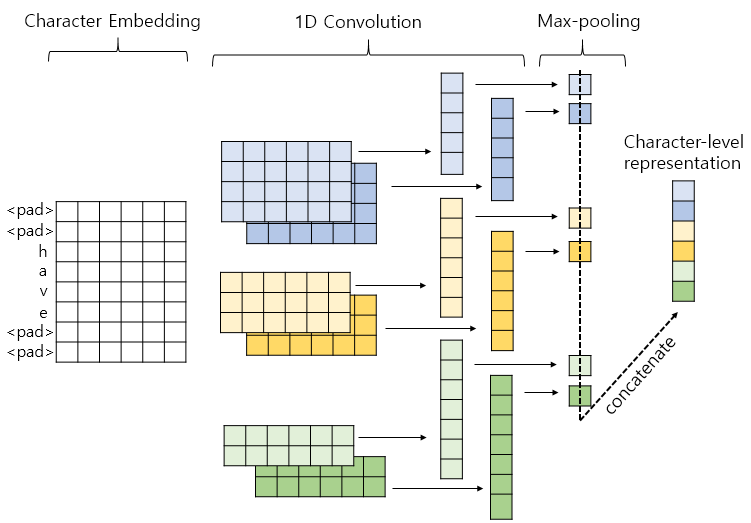

위의 그림은 임의의 단어 'have'에 대해서 1D CNN을 통해서 단어 표현 벡터를 얻는 과정을 보여줍니다. 우선, 단어 'have'를 'h', 'a', 'v', 'e'와 같이 문자 단위로 분리합니다. 그리고 임베딩 층(Embedding layer)을 이용한 임베딩을 단어에 대해서 하는 것이 아니라 문자에 대해서 하게 됩니다. 다시 말해 문자를 임베딩합니다. (문장의 길이를 맞추기 위해 패딩을 했던 지난 실습 예시들과 마찬가지로 여기서도 패딩은 가능합니다.) 그 후 1D CNN을 적용하게 되는데, 위의 그림은 커널의 사이즈가 4인 커널 2개, 3인 커널 2개, 2인 커널 2개를 사용할 때를 보여줍니다. 벡터가 6개므로 맥스 풀링을 한 후에는 6개의 스칼라 값을 얻는데, 이렇게 얻은 스칼라값들은 전부 연결(concatenate)하여 하나의 벡터로 만들어줍니다.

최종적으로 이렇게 얻은 벡터를 단어 'have'의 벡터로 사용합니다. 그림에서는 문자 레벨 표현(Character-level representation)이라고 기재된 벡터에 해당됩니다. 이렇게 단어 벡터를 얻을 경우, 어떤 단어이든 기본적으로 문자 레벨로 쪼개므로 기존 워드 임베딩의 접근에서 OOV라고 하더라도 벡터를 얻을 수 있습니다. 가령, 'docker'라는 영단어가 훈련 데이터에 없었으나 테스트 데이터에 존재하는 단어였다고 해봅시다. Word2Vec이나 GloVe의 경우에는 OOV 문제가 발생하게 되겠지만, 1D CNN을 이용하는 경우에는 'd', 'o', 'c', 'k', 'e', 'r'로 전부 분리되어 각 문자로 임베딩이 되고나서 1D CNN을 거친 후에 'docker'의 벡터를 얻게됩니다.

### **2. BiLSTM을 이용한 문자 임베딩**

문자 임베딩을 얻는 또 다른 방법으로는 BiLSTM을 이용한 방법이 있습니다. 1D CNN때와 마찬가지로 기본적으로 단어를 문자로 쪼갠 후, 임베딩 층을 사용하여 문자 임베딩을 입력으로 사용하는 것은 같습니다. 이번 챕터도 BiLSTM을 이용한 텍스트 분류를 이해했다면 쉽습니다. BiLSTM의 다 대 일(many-to-one) 구조를 이해하기 어렵다면 BiLSTM을 이용한 한국어 스팀 리뷰 감성 분류하기 실습을 참고하시기 바랍니다.

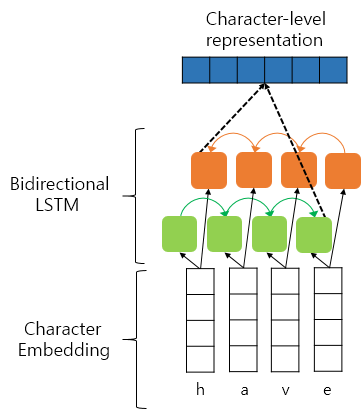

위 그림은 임의의 단어 'have'에 대해서 BiLSTM을 통해서 단어 표현 벡터를 얻는 과정을 보여줍니다. 우선, 단어 'have'를 'h', 'a', 'v', 'e'와 같이 문자 단위로 분리합니다. 그리고 임베딩 층(Embedding layer)을 이용한 임베딩을 단어에 대해서 하는 것이 아니라 문자에 대해서 하게 됩니다. 다시 말해 문자를 임베딩합니다. 그리고나서 순방향 LSTM은 단어 순방향으로 순차적으로 문자 임베딩 벡터를 읽습니다. 반면, 역방향 LSTM은 단어의 역방향으로 순차적으로 문자 임베딩 벡터를 읽습니다. 그리고 순방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태를 연결(concatenate)합니다. 최종적으로 이렇게 얻은 벡터를 단어 'have'의 벡터로 사용합니다. 그림에서는 문자 레벨 표현(Character-level representation)이라고 기재된 벡터에 해당됩니다.

문자 임베딩을 워드 임베딩의 대체재로서 쓰거나, 문자 임베딩을 워드 임베딩과 연결(concatenate)하여 신경망의 입력으로 사용하기도 합니다.

마지막 편집일시 : 2022년 11월 14일 3:09 오후